<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/04_05_Exercise_of_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

print('confusion_matrix:')
print(confusion_matrix(y, y_pred))

confusion_matrix:
[[337  20]
 [ 30 182]]


* 정확도

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y , y_pred)
print('accuracy:')
print(accuracy)

accuracy:
0.9121265377855887


* 정밀도

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y , y_pred)
print('precision: ')
print(precision)

precision: 
0.900990099009901


* 재현율

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y , y_pred)
print('recall: ')
print(recall)

recall: 
0.8584905660377359


* F1 score

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
print('f1 Score: ')
print(f1)

f1 Score: 
0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
threshold = 0.1
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=threshold).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

print("y_pred2:")
print(y_pred2)

y_pred2:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

#혼동행렬
conf_matrix = confusion_matrix(y, y_pred2)

# 정확도
accuracy_ = accuracy_score(y, y_pred2)

# 정밀도
precision_ = precision_score(y, y_pred2)

# 재현율
recall_ = recall_score(y, y_pred2)

# F1 점수
f1_score_ = f1_score(y, y_pred2)

# 결과 출력
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy_)
print("Precision:", precision_)
print("Recall:", recall_)
print("F1 Score:", f1_score_)


Confusion Matrix:
[[267  90]
 [  6 206]]
Accuracy: 0.8312829525483304
Precision: 0.6959459459459459
Recall: 0.9716981132075472
F1 Score: 0.8110236220472441


* ROC 곡선 시각화

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

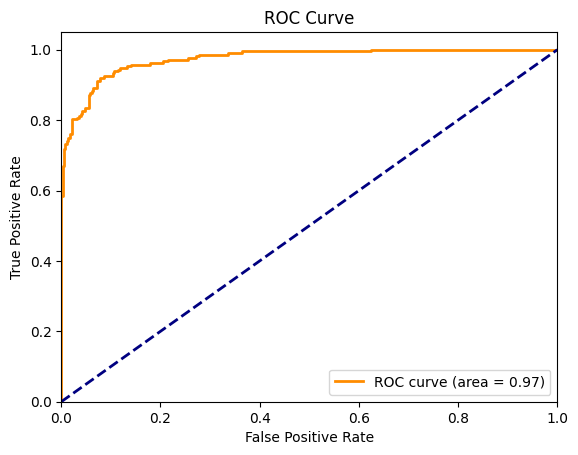

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

* ROC AUC 값

In [31]:
print("ROC AUC Score:")
print(roc_auc)

ROC AUC Score:
0.9741424871835527
